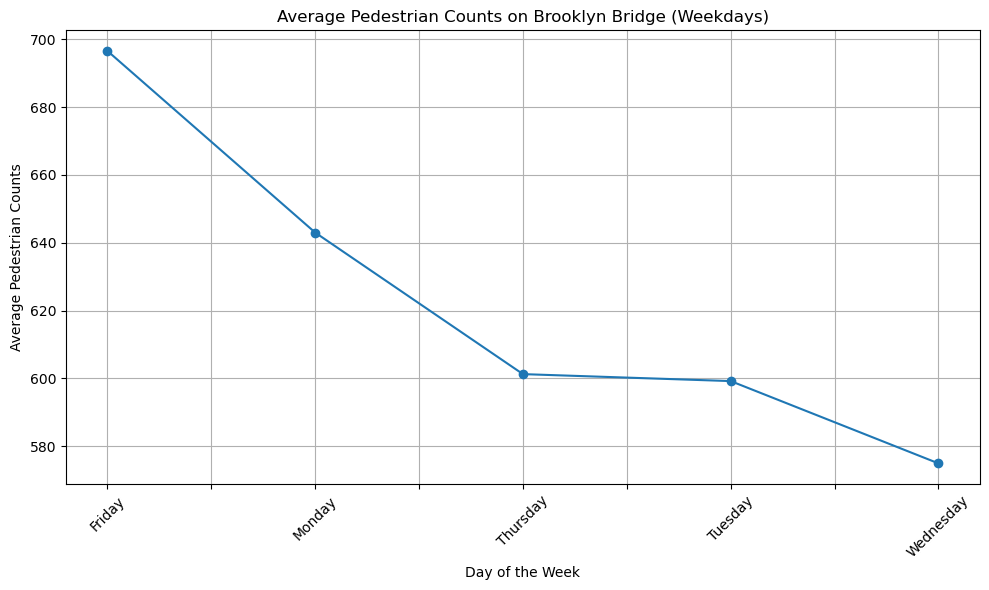

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Filter data to include only weekdays and plot pedestrian counts for each day of the week
data_url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
pedestrian_data = pd.read_csv(data_url)

# Convert 'hour_beginning' column to datetime format
pedestrian_data['hour_beginning'] = pd.to_datetime(pedestrian_data['hour_beginning'])

# Filter data to include only weekdays (Monday to Friday)
weekdays_data = pedestrian_data[pedestrian_data['hour_beginning'].dt.dayofweek < 5]

# Group by day of the week and calculate the mean pedestrian counts for each day
daily_pedestrian_counts = weekdays_data.groupby(weekdays_data['hour_beginning'].dt.day_name())['Pedestrians'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
daily_pedestrian_counts.plot(kind='line', marker='o')
plt.title('Average Pedestrian Counts on Brooklyn Bridge (Weekdays)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Convert 'hour_beginning' column to datetime format
pedestrian_data['hour_beginning'] = pd.to_datetime(pedestrian_data['hour_beginning'])

# Filter data for the year 2019 and Brooklyn Bridge location
bridge_2019_data = pedestrian_data[(pedestrian_data['hour_beginning'].dt.year == 2019) & (pedestrian_data['location'] == 'Brooklyn Bridge')]

# Group by 'weather_summary' and calculate average pedestrian counts
weather_pedestrian_counts = bridge_2019_data.groupby('weather_summary')['Pedestrians'].mean()

# Display pedestrian counts sorted by weather summary
print("Pedestrian Counts by Weather Summary:")
print(weather_pedestrian_counts)

# Create correlation matrix
correlation_matrix = bridge_2019_data[['weather_summary', 'Pedestrians']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

Pedestrian Counts by Weather Summary:
weather_summary
clear-day              1382.183298
clear-night              33.233871
cloudy                  543.225041
fog                     212.409091
partly-cloudy-day      1574.093627
partly-cloudy-night      52.765922
rain                    229.822076
sleet                   178.250000
snow                    222.631579
wind                    679.000000
Name: Pedestrians, dtype: float64

Correlation Matrix:
             Pedestrians
Pedestrians          1.0


C:\Users\92877\AppData\Local\Temp\ipykernel_8532\628399483.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bridge_2019_data[['weather_summary', 'Pedestrians']].corr()


In [6]:
# Convert 'hour_beginning' column to datetime format
pedestrian_data['hour_beginning'] = pd.to_datetime(pedestrian_data['hour_beginning'])

# Define the custom function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour.hour < 12:
        return 'Morning'
    elif 12 <= hour.hour < 17:
        return 'Afternoon'
    elif 17 <= hour.hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the custom function to create a new column 'Time of Day'
pedestrian_data['Time of Day'] = pedestrian_data['hour_beginning'].apply(categorize_time_of_day)

# Analyze pedestrian activity patterns throughout the day
pedestrian_activity_by_time_of_day = pedestrian_data.groupby('Time of Day')['Pedestrians'].mean()

print("Pedestrian Activity by Time of Day:")
print(pedestrian_activity_by_time_of_day)

Pedestrian Activity by Time of Day:
Time of Day
Afternoon    1749.484305
Evening      1073.079223
Morning       529.699338
Night          90.765360
Name: Pedestrians, dtype: float64
